#**SVM Using Random Instance Selection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import classification_report


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/malicious_phish.csv")

In [ ]:
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [ ]:
df1=df.sample(n=100000, random_state=42)
df1.head()

,url,type
536448,http://37.49.226.178/deusbins/deus.sh4,malware
40630,medical-dictionary.thefreedictionary.com/Galt+...,benign
630496,www.jscape.com/sshfactory/,phishing
426724,http://www.wsnc.org.au/component/jcalpro/view/983,defacement
184034,virtualtourist.com/travel/North_America/Canada...,benign


#**Feature Engineering**

In [ ]:
# Extract features (URLs) and target variable (Type)
X = df1['url']
y = df1['type']

# Convert the URLs to numerical features using TF-I0DF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Encode target labels (Phishing, Benign, Defacement, etc.)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#**Train the SVM Model**

In [ ]:
start_time = time.time()

# Create and train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Calculate training time
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training time: 1175.02 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     13268
           1       0.97      0.99      0.98      2874
           2       0.99      0.93      0.96      1013
           3       0.90      0.69      0.78      2845

    accuracy                           0.94     20000
   macro avg       0.95      0.90      0.92     20000
weighted avg       0.94      0.94      0.94     20000



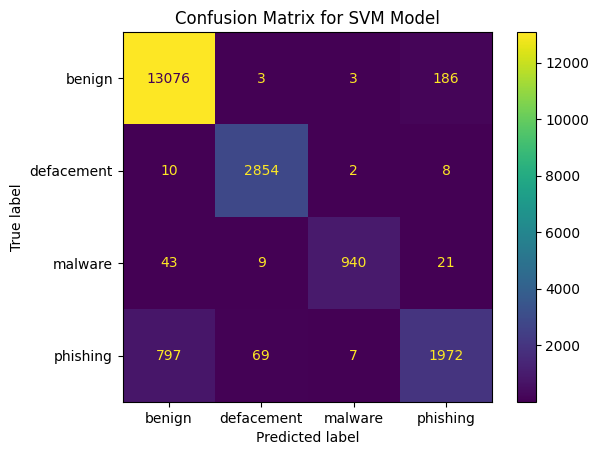

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=label_encoder.classes_)
plt.title('Confusion Matrix for SVM Model')
plt.show()


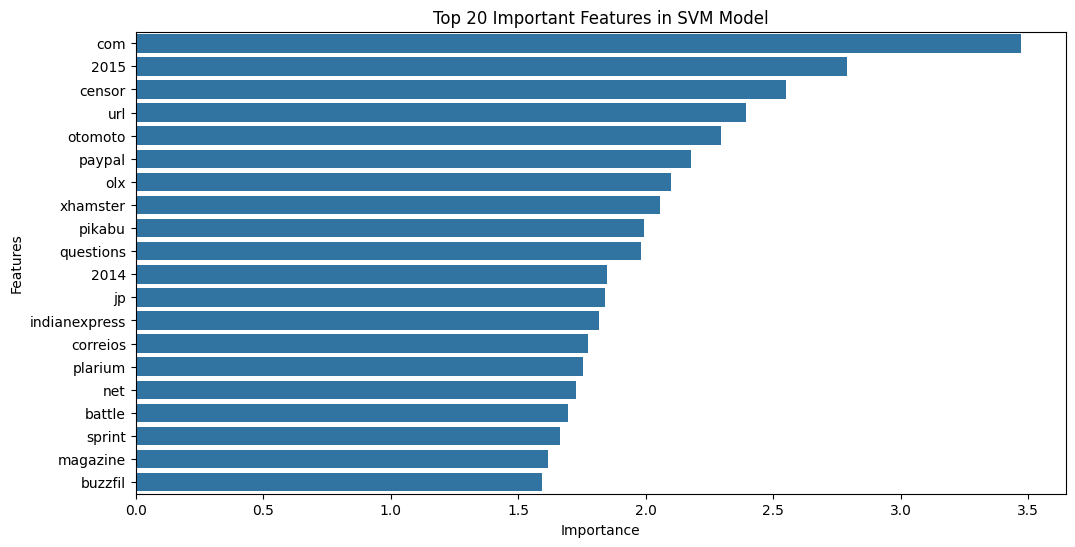

In [ ]:
# Analyze feature importance
# Get the feature names and the model coefficients
feature_names = vectorizer.get_feature_names_out()
importance = model.coef_.A[0]  # Use .A to convert to dense array

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizing feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))  # Display top 20 features
plt.title('Top 20 Important Features in SVM Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
